The task is to identify the profile of the typical customer for each product offered by a fitness company. To do this I will investigate whether there are differences across the product lines with respect to customer characteristics. The dataset we're working with contains information on individuals who purchased a treadmill at a retail store at any time in the past three months.

In [1]:
import pandas as pd
data = pd.read_csv("CardioGoodFitness.csv")

### What are the different types of variables in the data?

In [3]:
data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

## What is the distribution of different variables in the data?

### Product:

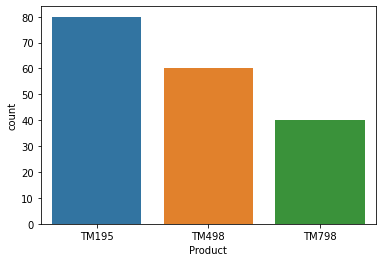

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# count of sales for each product
sns.countplot(data = data, x = 'Product')

# display the plot
plt.show()

### Age:

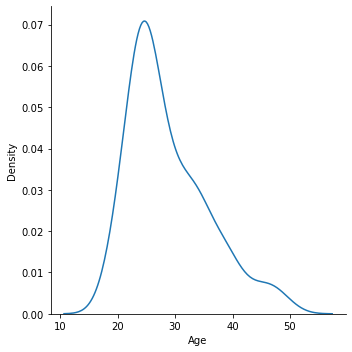

In [8]:
sns.displot(data['Age'], kind='kde')
plt.show()

We can interpret from the above plot that the typical age of a customer is between 20 and 35. 

### Gender:

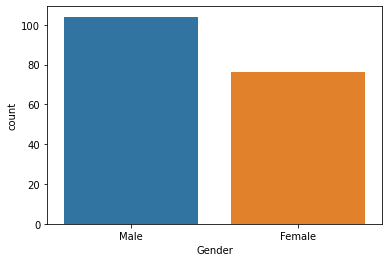

In [9]:
# count of observations for each product
sns.countplot(data = data, x = 'Gender')

# display the plot
plt.show()

More males than females.

### Education:

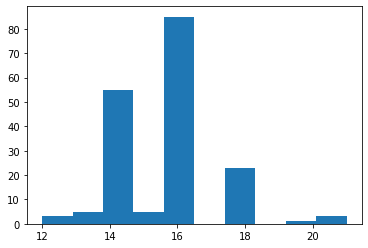

In [11]:
plt.hist(data['Education'])

plt.show()

Largest group is those with two year and four year degrees.

### Marital Status:

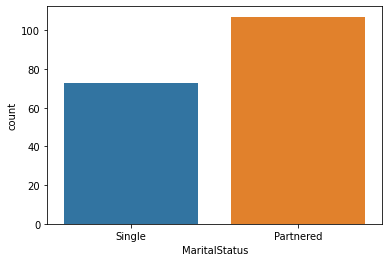

In [13]:
# count of observations for each product
sns.countplot(data = data, x = 'MaritalStatus')

# display the plot
plt.show()

More partnered than single customers.

### Usage:

The average number of times the customer plans to use the treadmill each week

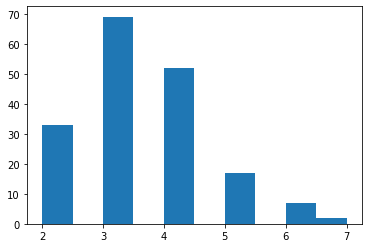

In [16]:
plt.hist(data['Usage'])
plt.show()

Mostly 3 or 4 times per week

### Income: 

Annual household income

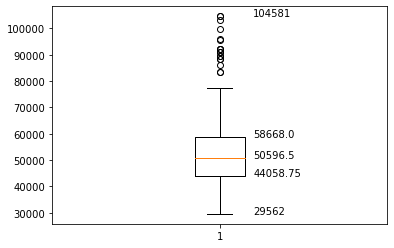

In [23]:
plt.boxplot(data['Income'])
plt.text(x = 1.1, y = data['Income'].min(), s =data['Income'].min())
plt.text(x = 1.1, y = data.Income.quantile(0.25), s =data.Income.quantile(0.25))
plt.text(x = 1.1, y = data['Income'].median(), s =data['Income'].median())
plt.text(x = 1.1, y = data.Income.quantile(0.75), s =data.Income.quantile(0.75))
plt.text(x = 1.1, y = data['Income'].max(), s =data['Income'].max())
plt.show()

Most customers have an income between 44,000 and 59,000 with a mean of about 51,000

### Miles:

The average number of miles the customer expects to walk/run each week

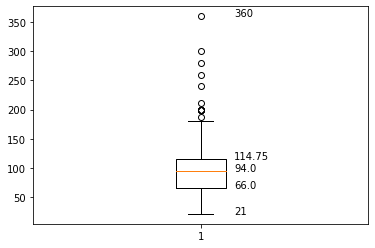

In [25]:
plt.boxplot(data['Miles'])
plt.text(x = 1.1, y = data['Miles'].min(), s =data['Miles'].min())
plt.text(x = 1.1, y = data.Miles.quantile(0.25), s =data.Miles.quantile(0.25))
plt.text(x = 1.1, y = data['Miles'].median(), s =data['Miles'].median())
plt.text(x = 1.1, y = data.Miles.quantile(0.75), s =data.Miles.quantile(0.75))
plt.text(x = 1.1, y = data['Miles'].max(), s =data['Miles'].max())
plt.show()

Most customers expect to run between 66 and 115 miles per week on their treadmill.

### Fitness:

Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is excellent shape.

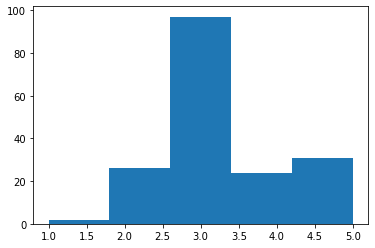

In [27]:
plt.hist(data['Fitness'], bins = 5)
plt.show()

## Which product is more popular among males or females?


<AxesSubplot:xlabel='Product', ylabel='count'>

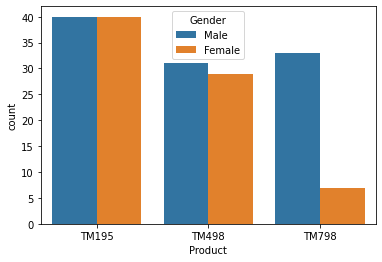

In [28]:
sns.countplot(x="Product", hue="Gender", data=data)

The TM798 product is markedly less popular among females and the TM195 is most popular for both genders.

## Is the product purchase affected by the marital status of the customer?


<AxesSubplot:xlabel='Product', ylabel='count'>

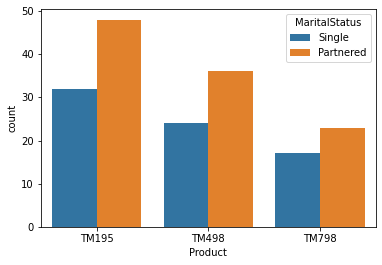

In [29]:
sns.countplot(x="Product", hue="MaritalStatus", data=data)

It doesn't appear so.

## Is there a significant correlation among some of the variables?


In [30]:
corr_matrix = data.corr()

corr_matrix

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


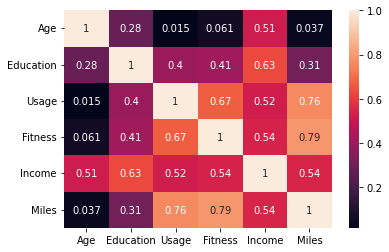

In [31]:
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

There is low correlation between miles and education, fitness and education, and usage and education. There is moderate correlation between age and income, age and education, education and income, usage and fitness, usage and income, fitness and income, and miles and income. There is high correlation between miles and usage, and miles and fitness.

## What is the distribution of the average number of miles for each product?

array([[<AxesSubplot:title={'center':'TM195'}>,
        <AxesSubplot:title={'center':'TM498'}>],
       [<AxesSubplot:title={'center':'TM798'}>, <AxesSubplot:>]],
      dtype=object)

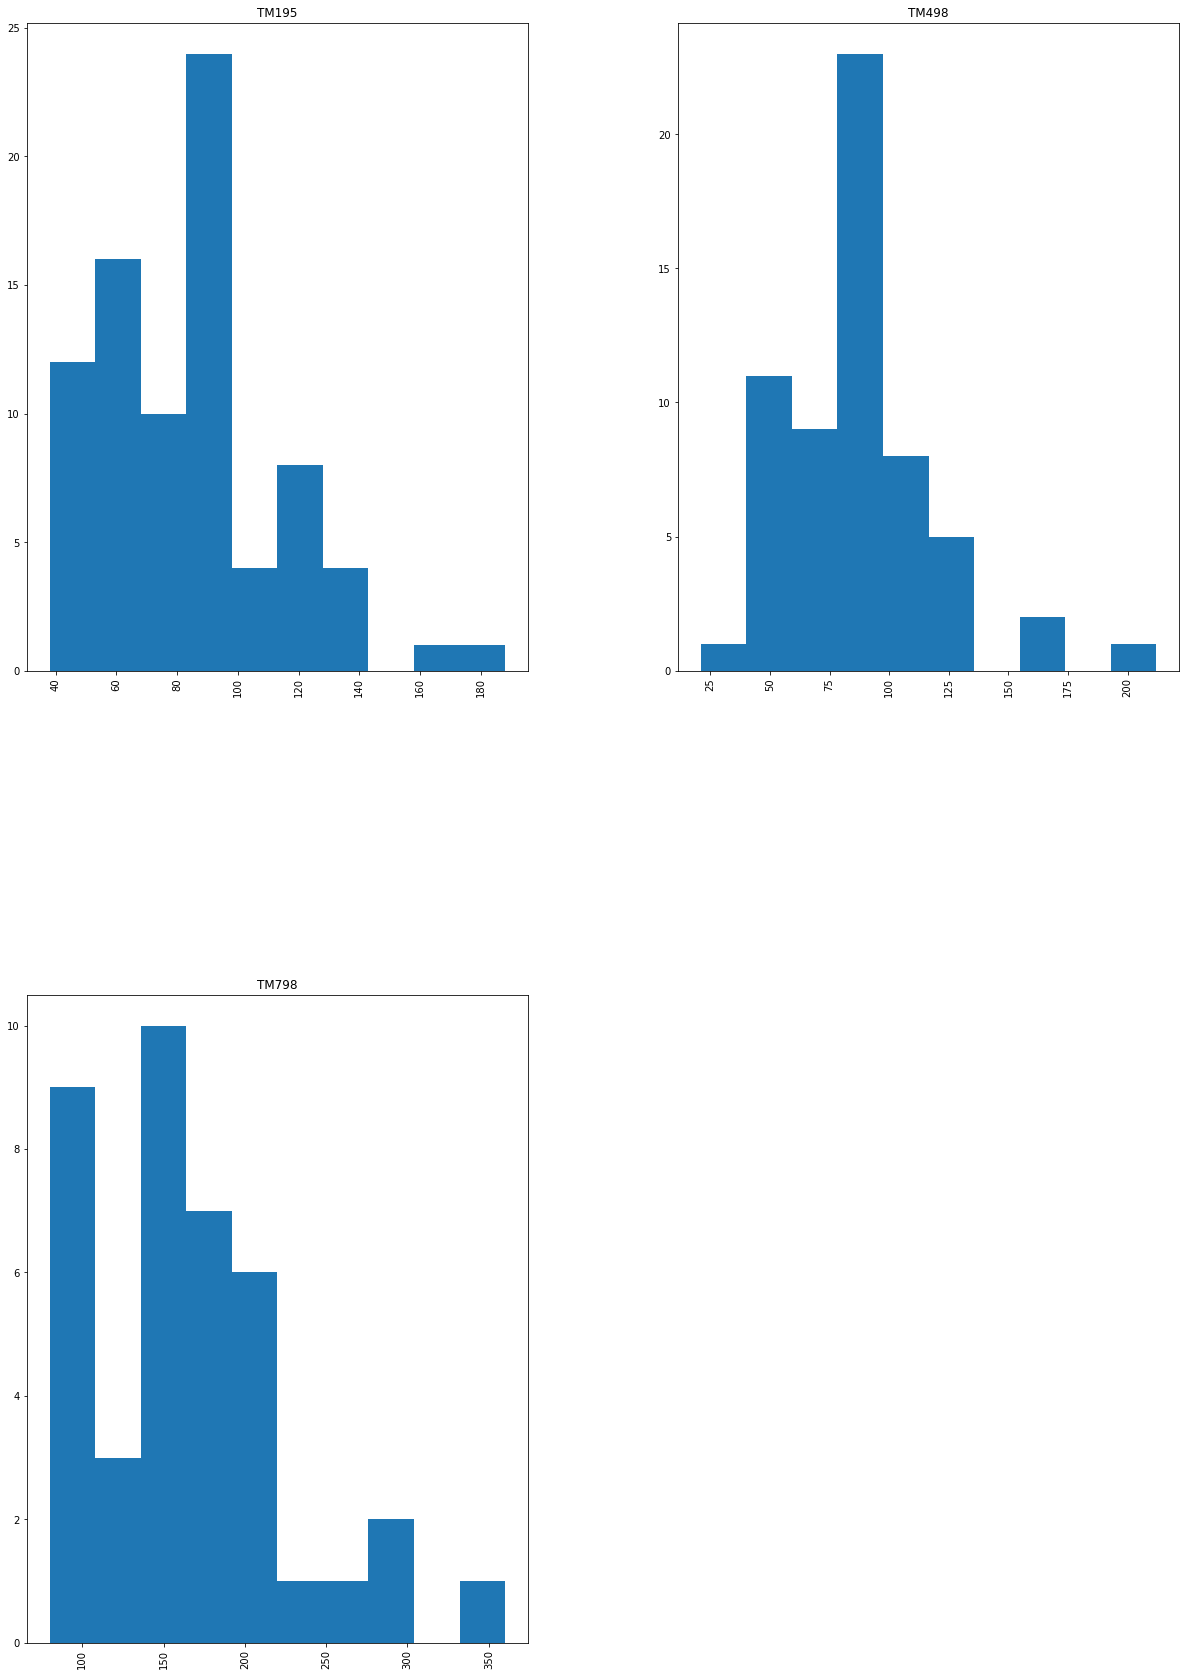

In [33]:
data.hist(by='Product',column = 'Miles', figsize=(20,30))

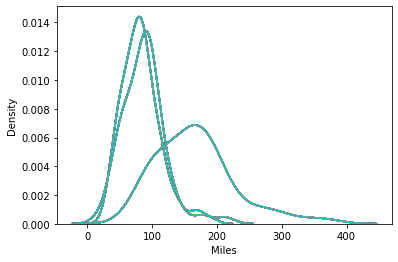

In [51]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

for i in data["Product"]:
    subset = data[data['Product'] == i]
    sns.distplot(subset['Miles'], hist = False, kde = True,label = i)

They are all skewed right with TM 798 having the fewest and TM498 having the most miles.